# 实习2 大气环流分型 EOF分析

## 为了更充分地描述环流场，短期气候2预测中利用自然函数正交展开（EOF）方法来分析环流的结构特征。本实习以欧亚地区500hPa位势高度场进行EOF分析为例，来学习大气环流的模态法。

## 使用eofs函数库
from eofs.standard import Eof



## 创建EOF实例

### Eof(dataset,weights,center,ddof)

输入：

  ##1.dataset：numpy.ndarray，numpy.ma.MaskedArray，dask.array.Array ：2维及以上数组，第一维为时间维。允许为掩码数组或np.nan，但缺测值需不随时间维变化(缺测位置固定)。

  ##2.weights：权重，与dataset形状相同或可执行广播形状的数组

  ##3.center：是否中心化(处理为距平)

  ##4.ddof: Delta degrees of freedom。自由度为N - ddof N为样本数(时间维).默认为1

返回：

##eof实例

## 获取EOF的时间序列

### eof.pcs(pcscaling=0, npcs=None)

输入：

##pcscaling：是否缩放时间序列。默认为0。0：不缩放；1：除特征值平方根；2：乘特征值平方根

##npcs：获取的时间序列数

返回：

##时间序列

## 获取空间向量
### eof.eofs(eofscaling=0, neofs=None)

## 空间向量对应的方差贡献
### eof.varianceFraction(neigs=None)

## 将EOF表示为每个网格点的PC和dataset之间的相关
### eof.eofsAsCorrelation(neofs=None)

## 特征根
### eof.eigenvalues(neigs=None):

## North检验
### eof.northTest(self, neigs=None, vfscaled=False)

输入：

##neigs:   返回典型误差的特征值数。默认为所有特征值的典型误差。如果请求的特征值数量大于可用的数量，则将返回所有可用特征值的典型误差。

##vfscaled：如果True，则按特征值之和缩放误差。

## 安装：

## conda install -c conda-forge eofs

# 

# 例1

第1模态和第2模态显著分离，通过north检验
第2模态和第3模态显著分离，通过north检验
第3模态和第4模态显著分离，通过north检验
第4模态和第5模态分离不显著，没有通过north检验
第1模态：22.41%
第2模态：5.41%
第3模态：3.72%
第4模态：2.80%


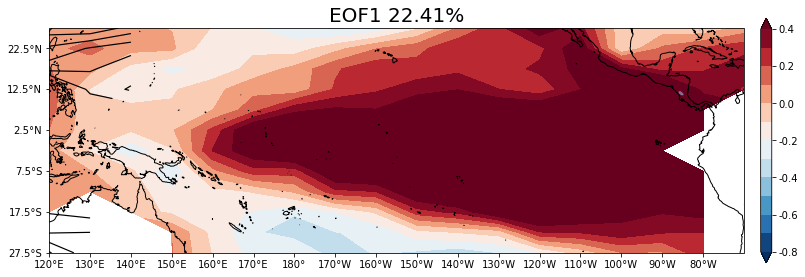

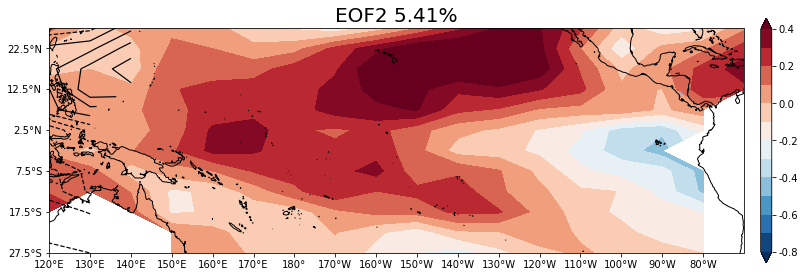

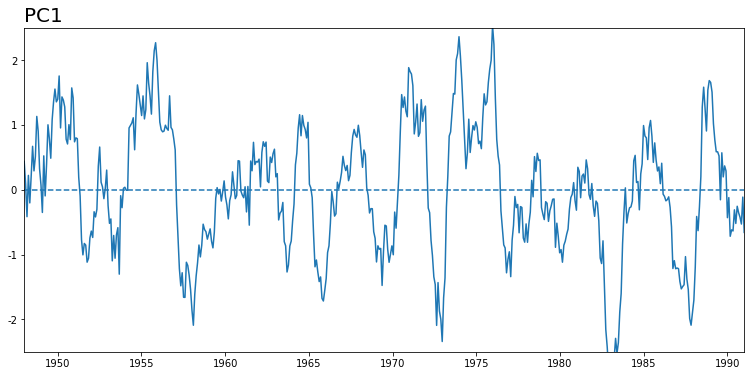

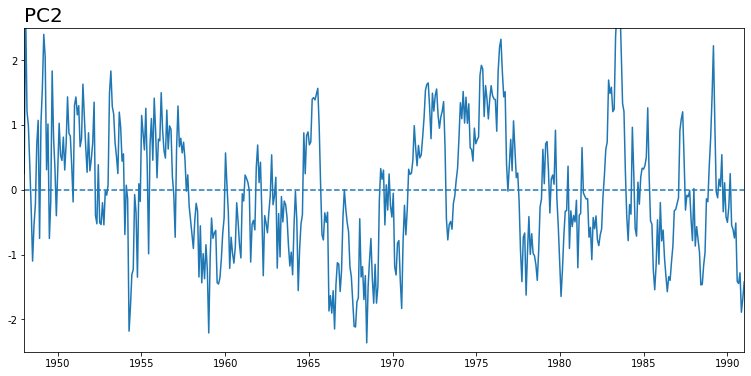

In [2]:
from xgrads import open_CtlDataset
import numpy as np
from eofs.standard import Eof
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker   
#读取ctl 转为xarray.Dataset格式 
dset = open_CtlDataset(r"D:\data\meteorological_statistics_class\sx08\sstpx.ctl")

time=dset['time'].values
st=dset['S'].values

###eof分解
k=5          ##模态数
eof = Eof(st)
st_eof = eof.eofsAsCorrelation(neofs=k)
st_pc = eof.pcs(npcs=k, pcscaling=1)
st_var = eof.varianceFraction(neigs=k)

###north检验
a=eof.northTest(neigs=k)
b=eof.eigenvalues(neigs=k)
for i in range (0,k-1):
    if (b[i+1]+a[i+1])<(b[i]-a[i]):
        print('第%d模态和第%d模态显著分离，通过north检验'%(i+1,i+2))
    else:
        print('第%d模态和第%d模态分离不显著，没有通过north检验'%(i+1,i+2))
for i in range (0,4):
    print('第%d模态：%.2f'%(i+1,st_var[i]*100)+'%')

##画图函数
##data画图数据矩阵leftlon, rightlon, lowerlat经纬度范围,a数据经度,name图片名称
def draw1(data,leftlon, rightlon, lowerlat, upperlat,name):
    lon=np.arange(leftlon, rightlon+0.01,10)
    lat=np.arange(lowerlat, upperlat+0.01,5)
    #建立画布
    proj = ccrs.PlateCarree(central_longitude=210) # 设置投影
    fig,f2_ax1=plt.subplots(figsize=(15,15),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=210)))
    leftlon, rightlon, lowerlat, upperlat = (leftlon, rightlon, lowerlat, upperlat)
    #在画布的绝对坐标建立子图
    f2_ax1.set_extent([leftlon,rightlon,lowerlat,upperlat],crs=ccrs.PlateCarree(central_longitude=0))
    #绘制
    data1=f2_ax1.contourf(lon,lat,-1*data,cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=0),levels=np.linspace(-0.8,0.4,13),extend='both')
    f2_ax1.contour(lon,lat,-1*data,colors='black',levels=np.linspace(-0.8,0.4,13),linewidths=1.2)
    #海岸线，50m精度,
    f2_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
    #湖泊数据
    f2_ax1.add_feature(cfeature.LAKES, alpha=0.5)
    #以下6条语句是定义地理坐标标签格式
    f2_ax1.set_xticks(np.arange(leftlon,rightlon,10), crs=ccrs.PlateCarree())
    f2_ax1.set_yticks(np.arange(lowerlat,upperlat,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    f2_ax1.xaxis.set_major_formatter(lon_formatter)
    f2_ax1.yaxis.set_major_formatter(lat_formatter)
    f2_ax1.set_title(name,loc='center',fontsize =20)
    # shrink 控制 colorbar 长度，pad 控制colorbar和图的距离
    plt.rcParams['axes.unicode_minus'] = False##负号显示问题
    plt.colorbar(data1, shrink=0.3, pad=0.02)#orientation='horizontal'位置参数
  
##画模态EOF图

draw1(st_eof[0,:,:],120,290,-27.5,27.5,'EOF1 22.41%')
draw1(st_eof[1,:,:],120,290,-27.5,27.5,'EOF2 5.41%')
##画模态PC图
time=np.linspace(1948,1991,516)

k=0
fig1= plt.figure(figsize=(20,15))
f2_ax= fig1.add_axes([0.65, 0.8, 0.5, 0.3])
f2_ax.set_title('PC1',loc='left',fontsize=20)
f2_ax.set_ylim(-2.5,2.5)
f2_ax.set_xlim(1948,1991)
f2_ax.axhline(0,linestyle="--")
f2_ax.plot(time,st_pc[:,k])

k=1
fig1= plt.figure(figsize=(20,15))
f2_ax= fig1.add_axes([0.65, 0.8, 0.5, 0.3])
f2_ax.set_title('PC2',loc='left',fontsize=20)
f2_ax.set_ylim(-2.5,2.5)
f2_ax.set_xlim(1948,1991)
f2_ax.axhline(0,linestyle="--")
f2_ax.plot(time,st_pc[:,k])

plt.show()


# 

# 例2

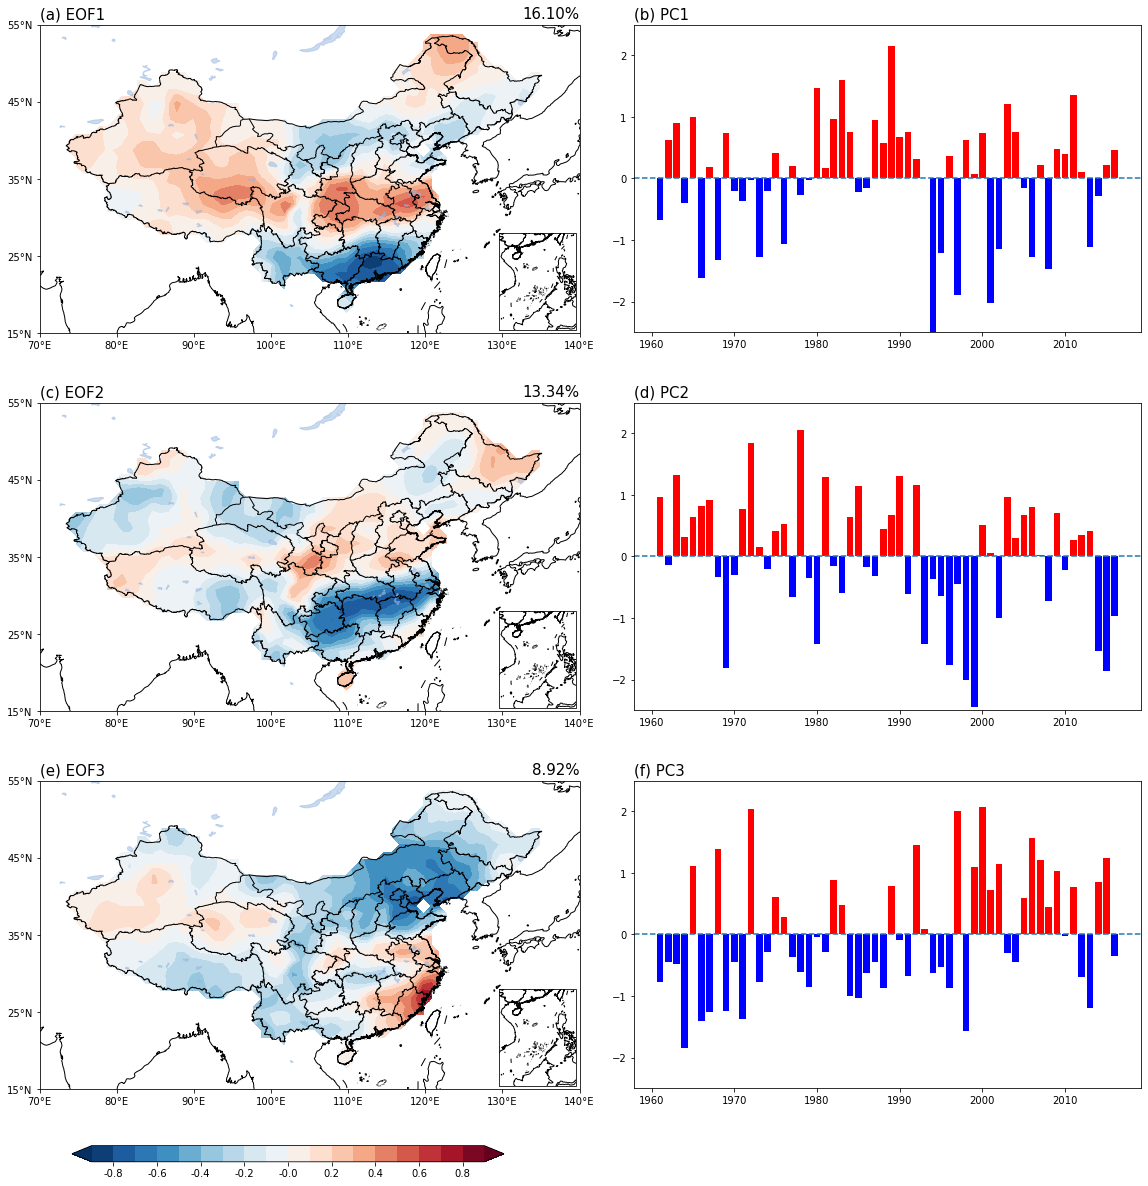

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader
import xarray as xr
from eofs.standard import Eof
f = xr.open_dataset(r"D:\data\data\pre.nc")
pre = np.array(f['pre'])
pre_lat = f['lat']
pre_lon = f['lon']
lat = np.array(pre_lat)
coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(pre, weights=wgts)
eof = solver.eofsAsCorrelation(neofs=3)
pc = solver.pcs(npcs=3, pcscaling=1)
var = solver.varianceFraction()
color1=[]
color2=[]
color3=[]
for i in range(1961,2017):
    if pc[i-1961,0] >=0:
        color1.append('red')
    elif pc[i-1961,0] <0:
        color1.append('blue')
    if pc[i-1961,1] >=0:
        color2.append('red')
    elif pc[i-1961,1] <0:
        color2.append('blue')
    if pc[i-1961,2] >=0:
        color3.append('red')
    elif pc[i-1961,2] <0:
        color3.append('blue')
fig = plt.figure(figsize=(15,15))
proj = ccrs.PlateCarree(central_longitude=115)
leftlon, rightlon, lowerlat, upperlat = (70,140,15,55)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

#绘制填色图
fig_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.add_feature(cfeature.LAKES, alpha=0.5)
fig_ax1.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree())
fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax1.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
fig_ax1.set_title('(a) EOF1',loc='left',fontsize =15)
fig_ax1.set_title( '%.2f%%' % (var[0]*100),loc='right',fontsize =15)
c1=fig_ax1.contourf(pre_lon,pre_lat, eof[0,:,:], levels=np.arange(-0.9,1.0,0.1), zorder=0, extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)


fig_ax2 = fig.add_axes([0.1, 0.45, 0.5, 0.3],projection = proj)
fig_ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
fig_ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax2.add_feature(cfeature.LAKES, alpha=0.5)
fig_ax2.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
fig_ax2.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree())
fig_ax2.xaxis.set_major_formatter(lon_formatter)
fig_ax2.yaxis.set_major_formatter(lat_formatter)
china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax2.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
fig_ax2.set_title('(c) EOF2',loc='left',fontsize =15)
fig_ax2.set_title( '%.2f%%' % (var[1]*100),loc='right',fontsize =15)
c2=fig_ax2.contourf(pre_lon,pre_lat, eof[1,:,:], levels=np.arange(-0.9,1.0,0.1), zorder=0, extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)


fig_ax3 = fig.add_axes([0.1, 0.1, 0.5, 0.3],projection = proj)
fig_ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
fig_ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax3.add_feature(cfeature.LAKES, alpha=0.5)
fig_ax3.set_xticks(np.arange(leftlon,rightlon+10,10), crs=ccrs.PlateCarree())
fig_ax3.set_yticks(np.arange(lowerlat,upperlat+10,10), crs=ccrs.PlateCarree())
fig_ax3.xaxis.set_major_formatter(lon_formatter)
fig_ax3.yaxis.set_major_formatter(lat_formatter)
china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax3.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
fig_ax3.set_title('(e) EOF3',loc='left',fontsize =15)
fig_ax3.set_title( '%.2f%%' % (var[2]*100),loc='right',fontsize =15)
c3=fig_ax3.contourf(pre_lon,pre_lat, eof[2,:,:], levels=np.arange(-0.9,1.0,0.1), zorder=0, extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

#绘制子图的海南岛
fig_ax11 = fig.add_axes([0.525, 0.08, 0.072, 0.15],projection = proj)
fig_ax11.set_extent([105, 125, 0, 25], crs=ccrs.PlateCarree())
fig_ax11.add_feature(cfeature.COASTLINE.with_scale('50m'))
china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax11.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)


fig_ax22 = fig.add_axes([0.525, 0.43, 0.072, 0.15],projection = proj)
fig_ax22.set_extent([105, 125, 0, 25], crs=ccrs.PlateCarree())
fig_ax22.add_feature(cfeature.COASTLINE.with_scale('50m'))
china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax22.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)


fig_ax33 = fig.add_axes([0.525, 0.78, 0.072, 0.15],projection = proj)
fig_ax33.set_extent([105, 125, 0, 25], crs=ccrs.PlateCarree())
fig_ax33.add_feature(cfeature.COASTLINE.with_scale('50m'))
china = shpreader.Reader(r"D:\data\china_map\bou2_4l.dbf").geometries()
fig_ax33.add_geometries(china, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)

#色标
cbposition=fig.add_axes([0.13, 0.04, 0.4, 0.015])
fig.colorbar(c1,cax=cbposition,orientation='horizontal',format='%.1f',)

#绘制对应的条形图
fig_ax4 = fig.add_axes([0.65, 0.808, 0.47, 0.285])
fig_ax4.set_title('(b) PC1',loc='left',fontsize = 15)
fig_ax4.set_ylim(-2.5,2.5)
fig_ax4.axhline(0,linestyle="--")
fig_ax4.bar(np.arange(1961,2017,1),pc[:,0],color=color1)


fig_ax5 = fig.add_axes([0.65, 0.458, 0.47, 0.285])
fig_ax5.set_title('(d) PC2',loc='left',fontsize = 15)
fig_ax5.set_ylim(-2.5,2.5)
fig_ax5.axhline(0,linestyle="--")
fig_ax5.bar(np.arange(1961,2017,1),pc[:,1],color=color2)


fig_ax6 = fig.add_axes([0.65, 0.108, 0.47, 0.285])
fig_ax6.set_title('(f) PC3',loc='left',fontsize = 15)
fig_ax6.set_ylim(-2.5,2.5)
fig_ax6.axhline(0,linestyle="--")
fig_ax6.bar(np.arange(1961,2017,1),pc[:,2],color=color3)


plt.show()


#  

##  1.1导入库

In [5]:
from eofs.standard import Eof
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [6]:
f_z = xr.open_dataset("D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])
f_z

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 519)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

## 1.2 对1979-2020年1月欧亚地区（20-70N, 40-140E）500hPa高度场进行自然正交展开（EOF），输出EOF的前三个特征向量、时间系数、方差贡献；

In [9]:
#索取1979-2020年1月欧亚地区（20-70N, 40-140E）500hPa高度的hgt
z = f_z['hgt'].loc[f_z.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01'].loc[:,500,70:20,40:140]
#索取1991-2020年1月欧亚地区（20-70N, 40-140E）500hPa高度的hgt
z1 = f_z['hgt'].loc[f_z.time.dt.month.isin([1])].loc['1991-01-01':'2020-02-01'].loc[:,500,70:20,40:140]
#求平均位势高度场（即气候态）
ave_hgt = np.array(z1).reshape(30, 21, 41).mean(0) 
z.shape,ave_hgt.shape

((42, 21, 41), (21, 41))

In [4]:
z1.time

<xarray.DataArray 'time' (time: 30)>
array(['1991-01-01T00:00:00.000000000', '1992-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    level    float32 500.0
  * time     (time) datetime64[ns] 1991-01-01 1992-01-01 ... 2020-01-01
Attributes:
    long_name:           Time
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    prev_avg_period:     0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    bounds:              time_bnds
    actual_range:        [1569072. 1947432.]

In [5]:
#提取纬度
lat_z = f_z['lat'].loc[70:20]
lat_z

<xarray.DataArray 'lat' (lat: 21)>
array([70. , 67.5, 65. , 62.5, 60. , 57.5, 55. , 52.5, 50. , 47.5, 45. , 42.5,
       40. , 37.5, 35. , 32.5, 30. , 27.5, 25. , 22.5, 20. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 70.0 67.5 65.0 62.5 60.0 ... 30.0 27.5 25.0 22.5 20.0
Attributes:
    units:               degrees_north
    actual_range:        [ 90. -90.]
    long_name:           Latitude
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point

In [6]:
#提取经度
lon_z = f_z['lon'].loc[40:140]
lon_z

<xarray.DataArray 'lon' (lon: 41)>
array([ 40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,
        65. ,  67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. , 112.5,
       115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
       140. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 40.0 42.5 45.0 47.5 50.0 ... 132.5 135.0 137.5 140.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0.  357.5]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  point

In [7]:

#权重处理
coslat = np.cos(np.deg2rad(np.array(lat_z))).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
#eof实例
eof = Eof(np.array(z-ave_hgt), weights=wgts)#数据距平后
eof1 = Eof(np.array(z), weights=wgts)#数据未距平后
k=5#模态数

z_eof = eof.eofsAsCorrelation(neofs=k)#特征向量
z_pc = eof.pcs(npcs=k, pcscaling=1)#时间序列
z_var = eof.varianceFraction(neigs=k)#方差系数

z1_eof=eof1.eofs(neofs=k)
z1_pc = eof1.pcs(npcs=k, pcscaling=1)#时间序列
z1_var = eof1.varianceFraction(neigs=k)#方差系数

In [8]:
print(z_var)
print(z1_var)#

[0.41415143 0.19933909 0.10299554 0.07972375 0.0545418 ]
[0.41415143 0.19933909 0.10299552 0.07972377 0.05454179]


### 二者差别不大

## north检验

In [9]:
a=eof.northTest(neigs=k)#north检验
b=eof.eigenvalues(neigs=k)#特征根
for i in range (0,k-1):
    if (b[i+1]+a[i+1])<(b[i]-a[i]):
        print('第%d模态和第%d模态显著分离，通过north检验'%(i+1,i+2))
    else:
        print('第%d模态和第%d模态分离不显著，没有通过north检验'%(i+1,i+2))
for i in range (0,4):
    print('第%d模态：%.2f'%(i+1,z_var[i]*100)+'%')


第1模态和第2模态显著分离，通过north检验
第2模态和第3模态显著分离，通过north检验
第3模态和第4模态分离不显著，没有通过north检验
第4模态和第5模态分离不显著，没有通过north检验
第1模态：41.42%
第2模态：19.93%
第3模态：10.30%
第4模态：7.97%


## 绘图函数

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker


def contour_map(fig_ax,img_extent,spec,eof_name,data_z_var,size,lon,lat,data_eof):
    fig_ax.set_extent(img_extent, crs=ccrs.PlateCarree())
    fig_ax.add_feature(cfeature.COASTLINE.with_scale('50m')) 
    fig_ax.add_feature(cfeature.LAKES, alpha=0.5)
    fig_ax.set_xticks(np.arange(leftlon,rightlon+spec,spec), crs=ccrs.PlateCarree())
    fig_ax.set_yticks(np.arange(lowerlat,upperlat+spec,spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig_ax.xaxis.set_major_formatter(lon_formatter)
    fig_ax.yaxis.set_major_formatter(lat_formatter)
    fig_ax.set_title(eof_name,loc='left',fontsize =size)
    fig_ax.set_title( '%.2f%%' % (data_z_var*100),loc='right',fontsize =size)
    ax_colorbar=fig_ax.contourf(lon,lat,data_eof,levels=np.arange(-0.9,1.0,0.1), extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
    fig_ax.contour(lon,lat,data_eof,levels=np.arange(-0.9,1.0,0.1),colors='black',transform=ccrs.PlateCarree())
    # shrink 控制 colorbar 长度，pad 控制colorbar和图的距离
    plt.rcParams['axes.unicode_minus'] = False##负号显示问题
    plt.colorbar(ax_colorbar, shrink=0.6, pad=0.03)#orientation='horizontal'位置参数

def bar_map(fig_ax,pc_name,data_z_var,size,x,data_pc,start_year,end_year):
    color1=[]#条形图颜色：红+，蓝-
    for i in range(start_year,end_year):
        if data_pc[i-start_year] >=0:
              color1.append('red')
        elif data_pc[i-start_year] <0:
              color1.append('blue')
    
    fig_ax.set_title('(b) PC1',loc='left',fontsize =size)
    fig_ax.set_title( '%.2f%%' % (data_z_var*100),loc='right',fontsize =size)
    fig_ax.set_ylim(-3,3.,1)
    fig_ax.axhline(0,linestyle="--")
    fig_ax.bar(x,data_pc,color=color1)



## 公共设置

In [18]:
start_year,end_year=(1979,2021)#年份
years=range(start_year,end_year)
proj = ccrs.PlateCarree(central_longitude=90)
leftlon, rightlon, lowerlat, upperlat = (40,140,20,70)#经纬度范围
img_extent = [leftlon, rightlon, lowerlat, upperlat]

## 比较 .eofs和 .eofsAsCorrelation 的区别

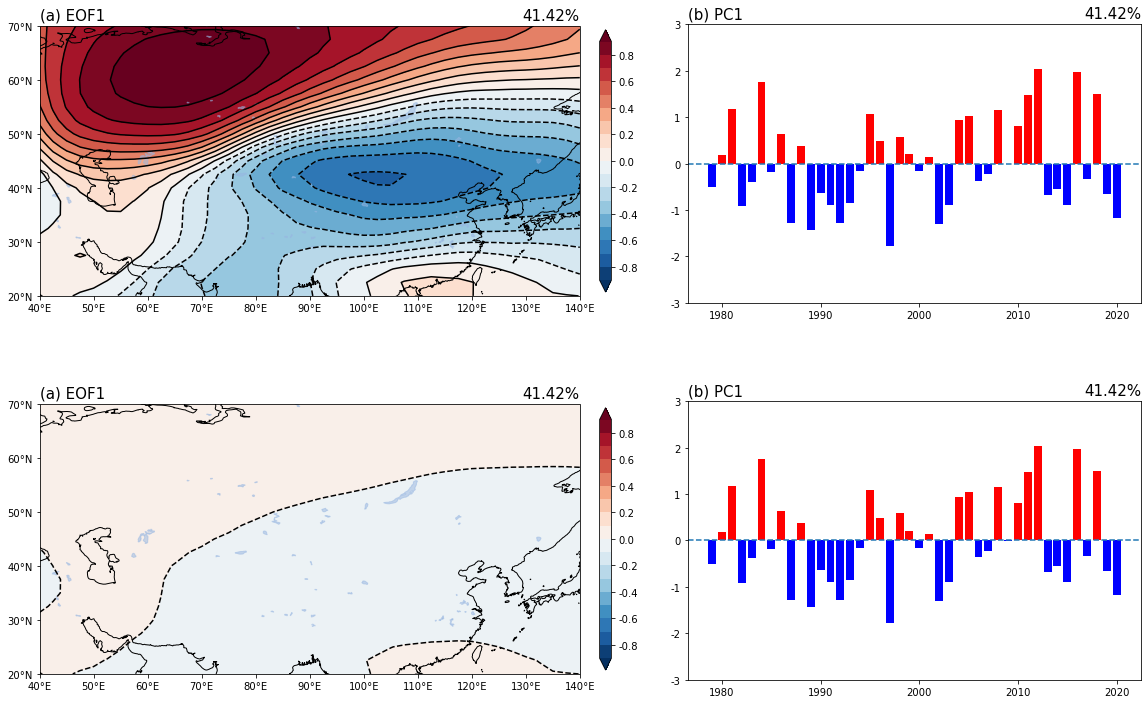

In [19]:
#设置画布
fig = plt.figure(figsize=(15,15))
#子图11
fig_ax11 = fig.add_axes([0.05, 0.75, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(a) EOF1',z_var[0],15,lon_z,lat_z,z_eof[0,:,:])
#子图12
fig_ax12 = fig.add_axes([0.65, 0.821, 0.42, 0.258])
bar_map(fig_ax12,'(b) PC1',z_var[0],15,years,z_pc[:,0],1979,2020)
#子图21
fig_ax11 = fig.add_axes([0.05, 0.40, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(a) EOF1',z1_var[0],15,lon_z,lat_z,z1_eof[0,:,:])
#子图22
fig_ax12 = fig.add_axes([0.65, 0.472, 0.42, 0.258])
bar_map(fig_ax12,'(b) PC1',z1_var[0],15,years,z1_pc[:,0],1979,2020)
      

## .eofsAsCorrelation 绘图

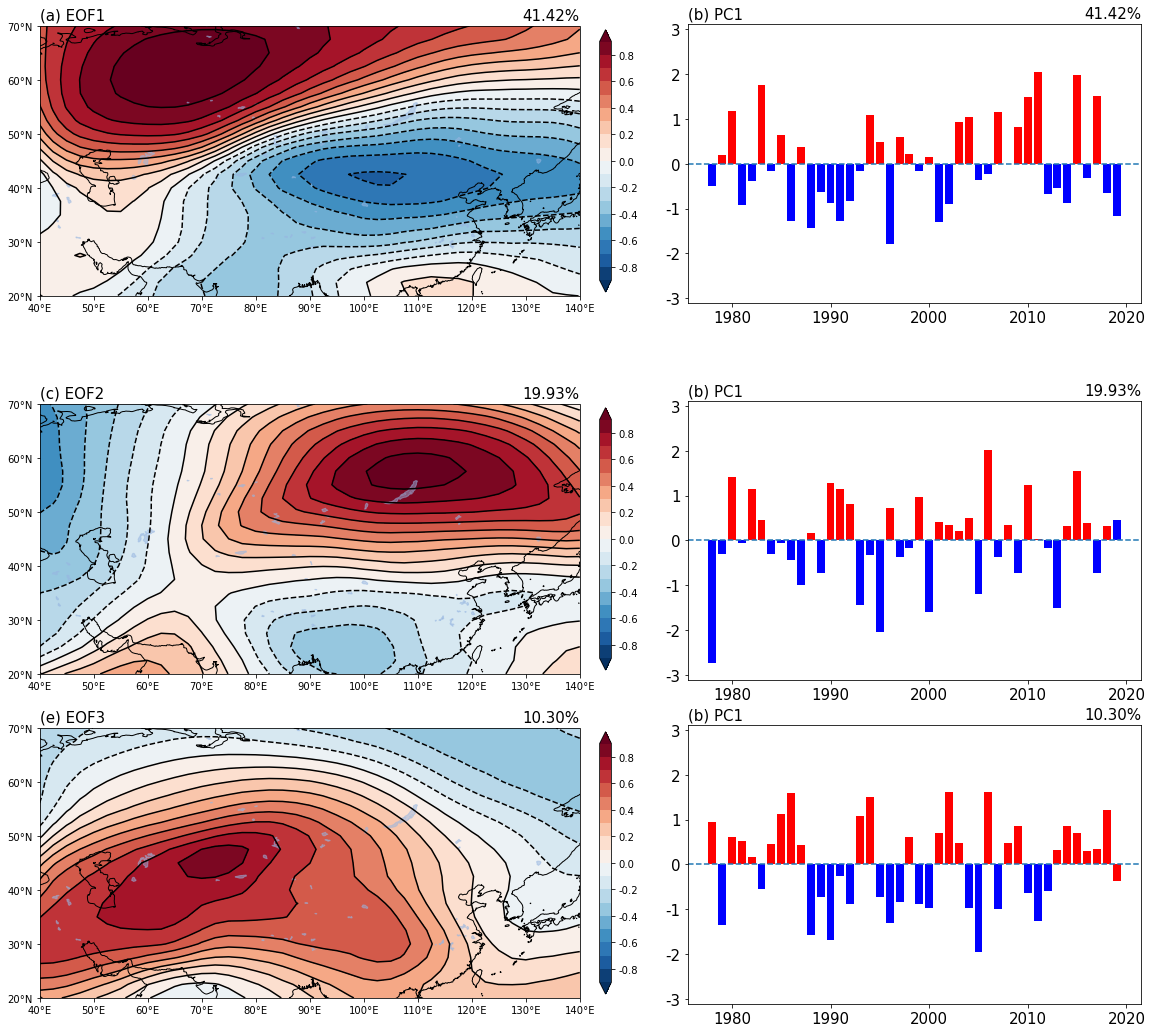

In [22]:
#设置画布
fig = plt.figure(figsize=(15,15))
#子图11
fig_ax11 = fig.add_axes([0.05, 0.75, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(a) EOF1',z_var[0],15,lon_z,lat_z,z_eof[0,:,:])

#子图12
fig_ax12 = fig.add_axes([0.65, 0.821, 0.42, 0.258])
bar_map(fig_ax12,'(b) PC1',z_var[0],15,years,z_pc[:,0],1979,2020)
#plt.text(100,12.2,s='LF',size=15)
#子图21
fig_ax11 = fig.add_axes([0.05, 0.40, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(c) EOF2',z_var[1],15,lon_z,lat_z,-1*z_eof[1,:,:])
#子图22
fig_ax12 = fig.add_axes([0.65, 0.472, 0.42, 0.258])
bar_map(fig_ax12,'(d) PC1',z_var[1],15,years,-1*z_pc[:,1],1979,2020)

#子图31
fig_ax11 = fig.add_axes([0.05, 0.10, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(e) EOF3',z_var[2],15,lon_z,lat_z,-1*z_eof[2,:,:])
#子图32
fig_ax12 = fig.add_axes([0.65, 0.172, 0.42, 0.258])
bar_map(fig_ax12,'(f) PC1',z_var[2],15,years,-1*z_pc[:,2],1979,2020)

plt.show()

## 完整代码

PROJ: proj_create_from_database: Cannot find proj.db


第1模态和第2模态显著分离，通过north检验
第2模态和第3模态显著分离，通过north检验
第3模态和第4模态分离不显著，没有通过north检验
第4模态和第5模态分离不显著，没有通过north检验
第1模态：41.42%
第2模态：19.93%
第3模态：10.30%
第4模态：7.97%


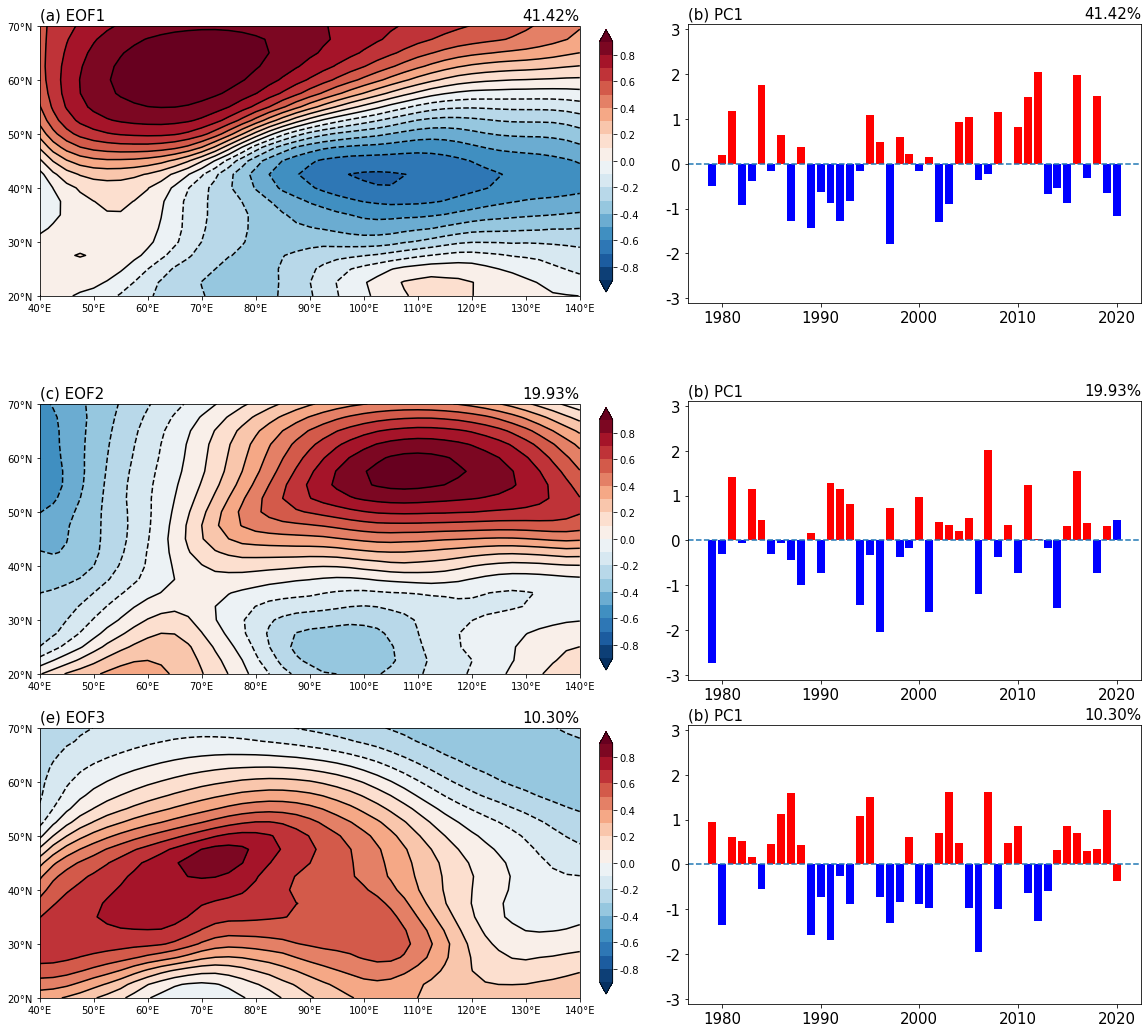

In [10]:
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
from eofs.standard import Eof

#读取nc数据集
f_z = xr.open_dataset("D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])

#索取1979-2020年1月欧亚地区（20-70N, 40-140E）500hPa高度的hgt
z = f_z['hgt'].loc[f_z.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01'].loc[:,500,70:20,40:140]

#索取1991-2020年1月欧亚地区（20-70N, 40-140E）500hPa高度的hgt
z1 = f_z['hgt'].loc[f_z.time.dt.month.isin([1])].loc['1991-01-01':'2020-02-01'].loc[:,500,70:20,40:140]

#求平均位势高度场（即气候态）
ave_hgt = np.array(z1).reshape(30, 21, 41).mean(0) 

#提取纬度
lat_z = f_z['lat'].loc[70:20]

#提取经度
lon_z = f_z['lon'].loc[40:140]

#权重处理
coslat = np.cos(np.deg2rad(np.array(lat_z))).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]

#eof实例
eof = Eof(np.array(z-ave_hgt), weights=wgts)#数据距平后
k=5#模态数,此次取5次
z_eof = eof.eofsAsCorrelation(neofs=k)#特征向量
z_pc = eof.pcs(npcs=k, pcscaling=1)#时间序列，1：除特征值平方根
z_var = eof.varianceFraction(neigs=k)#方差系数

#检验函数
def test_north(a,b,k):
    for i in range (0,k-1):
        if (b[i+1]+a[i+1])<(b[i]-a[i]):
            print('第%d模态和第%d模态显著分离，通过north检验'%(i+1,i+2))
        else:
            print('第%d模态和第%d模态分离不显著，没有通过north检验'%(i+1,i+2))
    for i in range (0,4):
            print('第%d模态：%.2f'%(i+1,z_var[i]*100)+'%')

#底图投影绘制函数
def contour_map(fig_ax,img_extent,spec,eof_name,data_z_var,size,lon,lat,data_eof):
    #投影设置
    fig_ax.set_extent(img_extent, crs=ccrs.PlateCarree())
    #填加海岸线
    fig_ax.add_feature(cfeature.COASTLINE.with_scale('50m')) 
    #添加湖泊
    fig_ax.add_feature(cfeature.LAKES, alpha=0.5)
    #添加经纬度设置
    fig_ax.set_xticks(np.arange(leftlon,rightlon+spec,spec), crs=ccrs.PlateCarree())
    fig_ax.set_yticks(np.arange(lowerlat,upperlat+spec,spec), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    fig_ax.xaxis.set_major_formatter(lon_formatter)
    fig_ax.yaxis.set_major_formatter(lat_formatter)
    #添加标题设置
    fig_ax.set_title(eof_name,loc='left',fontsize =size)
    fig_ax.set_title( '%.2f%%' % (data_z_var*100),loc='right',fontsize =size)
    #绘制填色图
    ax_colorbar=fig_ax.contourf(lon,lat,data_eof,levels=np.arange(-0.9,1.0,0.1), extend = 'both',
                                transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
    #绘制等值线
    fig_ax.contour(lon,lat,data_eof,levels=np.arange(-0.9,1.0,0.1),colors='black',
                   transform=ccrs.PlateCarree())
    #shrink控制colorbar长度，pad控制colorbar和图的距离
    plt.rcParams['axes.unicode_minus'] = False##负号显示问题
    plt.colorbar(ax_colorbar, shrink=0.6, pad=0.03)

#条形图底图绘制函数
def bar_map(fig_ax,pc_name,data_z_var,size,x,data_pc,start_year,end_year):
    c_color=[]#条形图颜色：红+，蓝-
    for i in range(start_year,end_year):
        if data_pc[i-start_year] >=0:
              c_color.append('red')
        elif data_pc[i-start_year] <0:
              c_color.append('blue')
    #设置标题
    fig_ax.set_title('(b) PC1',loc='left',fontsize =size)
    fig_ax.set_title('%.2f%%' % (data_z_var*100),loc='right',fontsize=size)
    #设置轴范围
    fig_ax.set_ylim(-3.1,3.1)
    #y=0设置为虚线
    fig_ax.axhline(0,linestyle="--")
    #设置刻度值大小
    plt.xticks(size=size)
    plt.yticks(size = size)
    #绘制条形图
    fig_ax.bar(x,data_pc,color=c_color)


#公共设置    
start_year,end_year=(1979,2020)#起始年份
years=range(start_year,end_year+1)
proj = ccrs.PlateCarree(central_longitude=90)#投影设置(中心为90°E)
leftlon, rightlon, lowerlat, upperlat = (40,140,20,70)#经纬度范围
img_extent = [leftlon, rightlon, lowerlat, upperlat]
a=eof.northTest(neigs=k)#north检验
b=eof.eigenvalues(neigs=k)#特征根

#打印检验结果结果
test_north(a,b,k)

#设置画布
fig = plt.figure(figsize=(15,15))
#子图11
fig_ax11 = fig.add_axes([0.05, 0.75, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(a) EOF1',z_var[0],15,lon_z,lat_z,z_eof[0,:,:])
#子图12
fig_ax12 = fig.add_axes([0.65, 0.821, 0.42, 0.258])
bar_map(fig_ax12,'(b) PC1',z_var[0],15,years,z_pc[:,0],1979,2020)
#子图21
fig_ax11 = fig.add_axes([0.05, 0.40, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(c) EOF2',z_var[1],15,lon_z,lat_z,-1*z_eof[1,:,:])
#子图22
fig_ax12 = fig.add_axes([0.65, 0.472, 0.42, 0.258])
bar_map(fig_ax12,'(d) PC1',z_var[1],15,years,-1*z_pc[:,1],1979,2020)
#子图31
fig_ax11 = fig.add_axes([0.05, 0.10, 0.61, 0.405],projection = proj)
contour_map(fig_ax11,img_extent,10,'(e) EOF3',z_var[2],15,lon_z,lat_z,-1*z_eof[2,:,:])
#子图32
fig_ax12 = fig.add_axes([0.65, 0.172, 0.42, 0.258])
bar_map(fig_ax12,'(f) PC1',z_var[2],15,years,-1*z_pc[:,2],1979,2020)
#存图
plt.savefig(r'D:\data\short_term_climate_class\sx02\eof.jpg',dpi=300,bbox_inches='tight')
plt.show()

### 最后修改于2022-04-22-19:03
### 若有错误联系 845728580@qq.com